In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train = pd.read_csv(r'C:\Users\Takyon\Documents\Customer propensity model\training_sample.csv')

In [3]:
test = pd.read_csv(r'C:\Users\Takyon\Documents\Customer propensity model\training_sample.csv')

In [4]:
train.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


In [5]:
test.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


Let's check for null values

In [6]:
train.isnull().sum()

UserID                     0
basket_icon_click          0
basket_add_list            0
basket_add_detail          0
sort_by                    0
image_picker               0
account_page_click         0
promo_banner_click         0
detail_wishlist_add        0
list_size_dropdown         0
closed_minibasket_click    0
checked_delivery_detail    0
checked_returns_detail     0
sign_in                    0
saw_checkout               0
saw_sizecharts             0
saw_delivery               0
saw_account_upgrade        0
saw_homepage               0
device_mobile              0
device_computer            0
device_tablet              0
returning_user             0
loc_uk                     0
ordered                    0
dtype: int64

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
basket_icon_click,455401.0,0.099150,0.298864,0.0,0.0,0.0,0.0,1.0
basket_add_list,455401.0,0.074521,0.262617,0.0,0.0,0.0,0.0,1.0
basket_add_detail,455401.0,0.112916,0.316490,0.0,0.0,0.0,0.0,1.0
sort_by,455401.0,0.036849,0.188391,0.0,0.0,0.0,0.0,1.0
image_picker,455401.0,0.026735,0.161307,0.0,0.0,0.0,0.0,1.0
account_page_click,455401.0,0.003570,0.059647,0.0,0.0,0.0,0.0,1.0
promo_banner_click,455401.0,0.016208,0.126274,0.0,0.0,0.0,0.0,1.0
detail_wishlist_add,455401.0,0.003511,0.059151,0.0,0.0,0.0,0.0,1.0
list_size_dropdown,455401.0,0.230362,0.421065,0.0,0.0,0.0,0.0,1.0
closed_minibasket_click,455401.0,0.017277,0.130302,0.0,0.0,0.0,0.0,1.0


As we can see our data is binary, let see some correlation

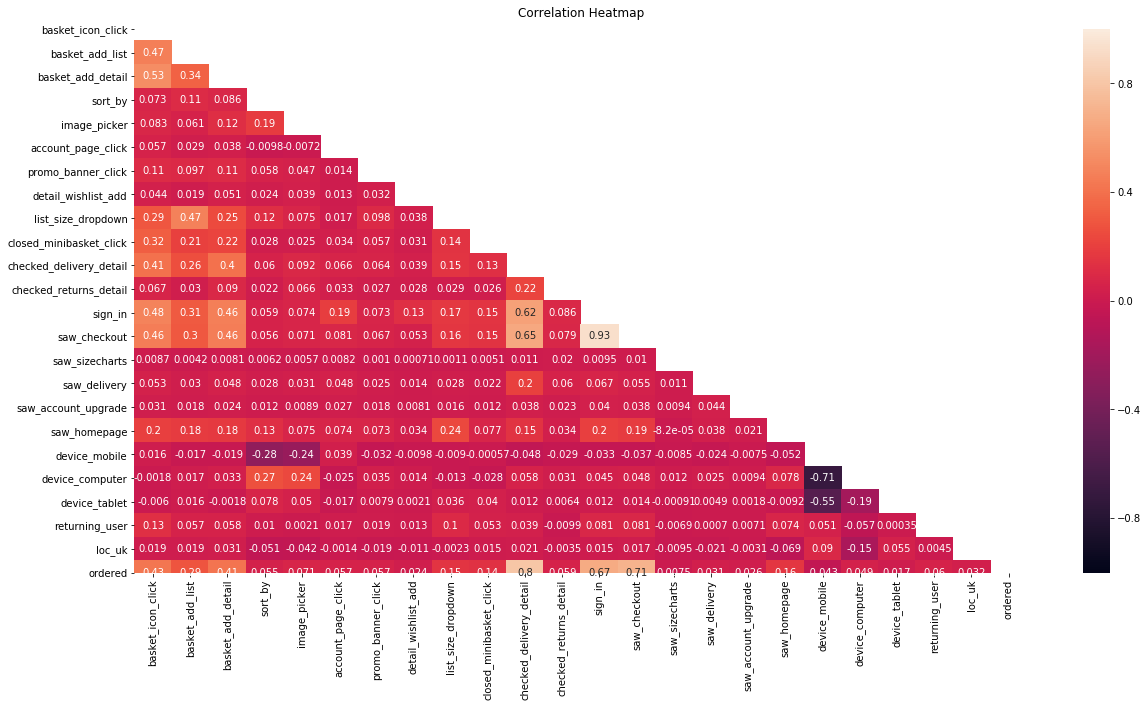

In [8]:
mask = np.triu(np.ones_like(train.corr(), dtype=np.bool))

plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(train.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

As we see there is strong correlation between  sign in, saw checkout, checked delivery detail.

Let's see what coeffs have a strong correlation to our target variable: ordered

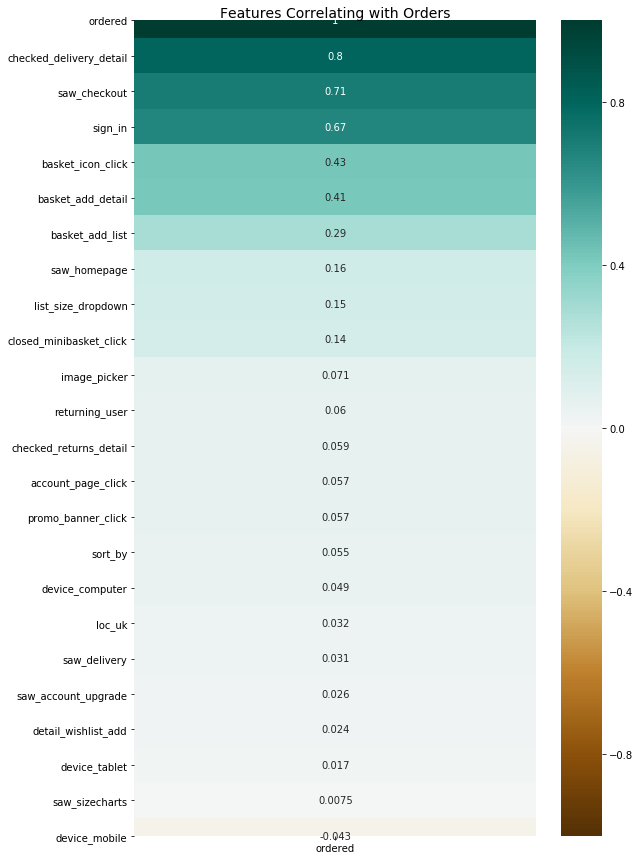

In [9]:
plt.figure(figsize=(9, 15))
heatmap = sns.heatmap(train.corr()[['ordered']].sort_values(by='ordered', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Orders', fontdict={'fontsize':14}, pad=1);

In [10]:
train['ordered'].value_counts()

0    436308
1     19093
Name: ordered, dtype: int64

In [11]:
y=train['ordered']
train_clean=train.drop(['UserID', 'ordered'], axis=1)

In [12]:
train_clean.head()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,0,1,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,1


In [13]:
test_clean=test.drop(['UserID', 'ordered'], axis=1)
test_pred=test['ordered']

Let's start predicting, we will use 4 classification models

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import accuracy_score

In [15]:
algorithm=[LogisticRegression(class_weight='balanced'), RandomForestClassifier(n_estimators=200, n_jobs=-1, class_weight='balanced'), XGBClassifier(), GaussianNB()]

In [16]:
res={}
for algo in algorithm:
    algo.fit(train_clean, y)
    alg_pred=algo.predict(test_clean)
    res[str(algo)] = accuracy_score(test_pred, alg_pred)
print(res)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{"LogisticRegression(C=1.0, class_weight='balanced', dual=False,\n                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,\n                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',\n                   random_state=None, solver='warn', tol=0.0001, verbose=0,\n                   warm_start=False)": 0.9920048484742019, "RandomForestClassifier(bootstrap=True, class_weight='balanced',\n                       criterion='gini', max_depth=None, max_features='auto',\n                       max_leaf_nodes=None, min_impurity_decrease=0.0,\n                       min_impurity_split=None, min_samples_leaf=1,\n                       min_samples_split=2, m

Xgboost is obviously a winner. Let's fine tune the parameters of XBGboost.

In [17]:
xgb_tuned = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=63)

In [18]:
xgb_tuned.fit(train_clean, y)
print(accuracy_score(test_pred,xgb_tuned.predict(test_clean)))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:14:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9936671197472118


In [19]:
from sklearn.model_selection import GridSearchCV

First param search of max_depth, min_child_weight

In [21]:
param_test1= {'max_weight': range(3,8,2),
             'mix_child_weight': range(1,6,2)}

gr_search = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1,
 n_estimators=500,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=63), param_grid=param_test1, scoring='accuracy', n_jobs=2, iid=False, cv=5, verbose=3)

gr_search.fit(train_clean, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed: 89.1min
[Parallel(n_jobs=2)]: Done  45 out of  45 | elapsed: 143.4min finished
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:13:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_weight", "mix_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [22]:
 gr_search.best_params_, gr_search.best_score_

({'max_weight': 3, 'mix_child_weight': 1}, 0.9929929870723466)